In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
fashion_train_df = pd.read_csv("./dados/fashion_train.csv",sep=',')
fashion_test_df = pd.read_csv("./dados/fashion_test.csv",sep=',')

In [3]:
fashion_train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape, fashion_test_df.shape

((60000, 785), (10000, 785))

In [6]:
training= np.array(fashion_train_df, dtype = 'float32')
testing= np.array(fashion_test_df, dtype = 'float32')

In [12]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Classe da imagem 7.0


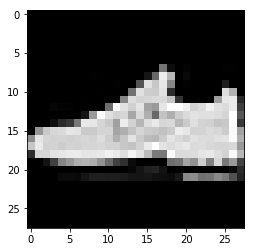

In [16]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28),cmap = 'gray')# primeira coluna Label não faz parte dos pixels
#Classe que a imagem pertence (1º coluna)
label = training[i,0] #ou#training[i][0]
print(f"Classe da imagem {label}")

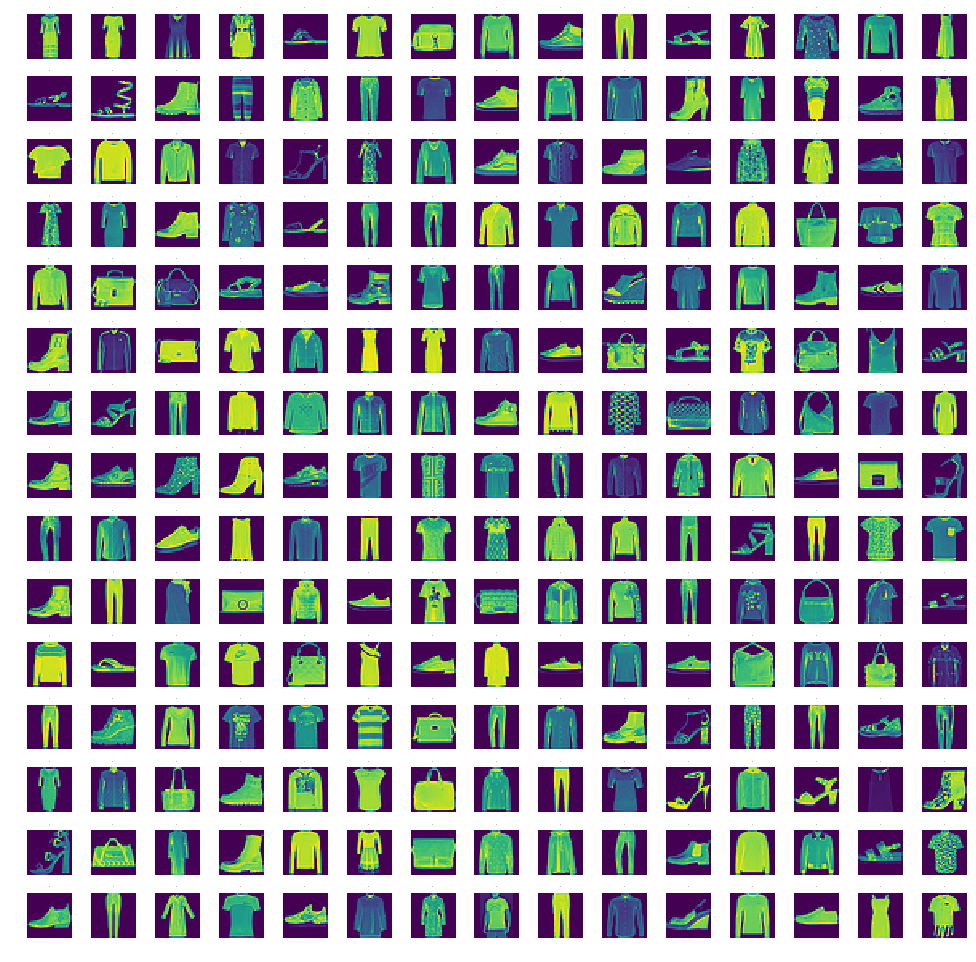

In [21]:
W_grid = 15
L_grid = 15
fig,axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 0)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [22]:
X_train = training[:,1:]/255 #Processamento mais rápido
y_train = training[:,0]

In [23]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [25]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [26]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [30]:
#Deixar no formato de imagem (number of imagens, rows, columns, chanel) obs: chanels= camadas
#obs: chanel = 1 pois estamos com imagens preto / branco e não RGB
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [31]:
X_train.shape

(60000, 28, 28, 1)

### Construção da Rede Neural

In [32]:
from tensorflow.keras import layers, models

In [36]:
cnn = models.Sequential()

# Camada 1 de convolucao
cnn.add(layers.Conv2D(
    filters = 32,#number of filters
    kernel_size = (3,3),#Filter detector
    activation = 'relu',#Activated function
    input_shape = (28,28,1), # só add na primeira camada! pois só temos uma camada de entrada
    )
)
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))

#Camada 2 de convolucao
cnn.add(layers.Conv2D(
    filters = 64,#number of filters
    kernel_size = (3,3),#Filter detector
    activation = 'relu',#Activated function
    input_shape = (28,28,1),
    )
)
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))


#Camada 3 de convolucao
cnn.add(layers.Conv2D(
    filters = 64,#number of filters
    kernel_size = (3,3),#Filter detector
    activation = 'relu',#Activated function
    input_shape = (28,28,1),
    )
)
# Ele não fez maxpooling2d nesta


cnn.add(layers.Flatten()) #Transforma matriz em Vetor

#Camada de entrada
cnn.add(layers.Dense(64, activation = 'relu'))
#Camada de saida
cnn.add(layers.Dense(10, activation = 'softmax')) # Temos 10 classificações (0,1,2,3,4,5,6,7,8,9)..logo 10 saídas

cnn.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [37]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer= "Adam",metrics = ['accuracy'])

In [39]:
history = cnn.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 29s 488us/sample - loss: 0.1772 - accuracy: 0.9367
Epoch 2/15
60000/60000 [==============================] - 29s 478us/sample - loss: 0.1722 - accuracy: 0.9377
Epoch 3/15
60000/60000 [==============================] - 29s 480us/sample - loss: 0.1668 - accuracy: 0.9405
Epoch 4/15
60000/60000 [==============================] - 29s 483us/sample - loss: 0.1633 - accuracy: 0.9426
Epoch 5/15
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1610 - accuracy: 0.9421
Epoch 6/15
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1577 - accuracy: 0.9437
Epoch 7/15
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1565 - accuracy: 0.9440
Epoch 8/15
60000/60000 [==============================] - 29s 491us/sample - loss: 0.1521 - accuracy: 0.9459
Epoch 9/15
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1508 - accuracy: 0.9

### Avaliação do Modelo

In [40]:
evaluation = cnn.evaluate(X_test, y_test)
evaluation

10000/10000 [==============================] - 2s 226us/sample - loss: 0.2527 - accuracy: 0.9155


[0.25265730035305023, 0.9155]

In [61]:
predicted_classes = cnn.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

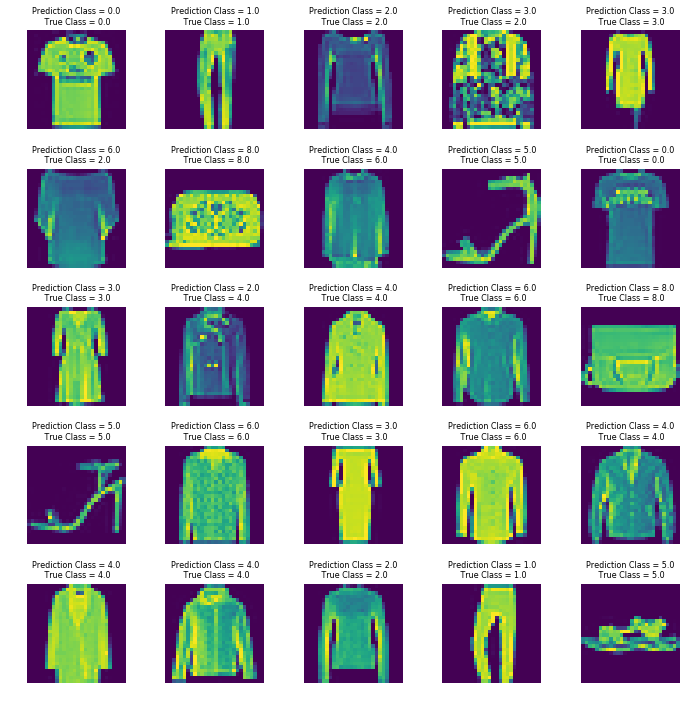

In [50]:
W_grid = 5
L_grid = 5
fig,axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,W_grid*L_grid):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title(
        "Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]),
        fontsize = 8,
    )
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [51]:
#comparacao
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [52]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

In [53]:
from sklearn.metrics import confusion_matrix

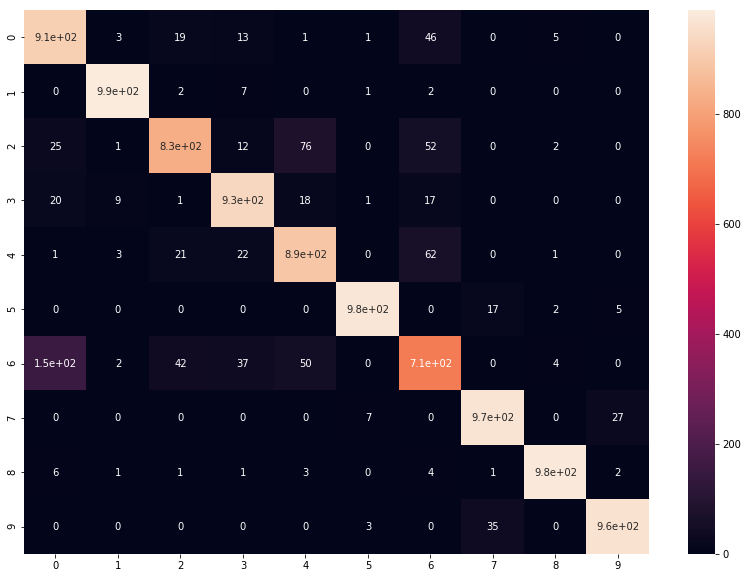

In [54]:
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm,annot =True)

In [55]:
cm

array([[912,   3,  19,  13,   1,   1,  46,   0,   5,   0],
       [  0, 988,   2,   7,   0,   1,   2,   0,   0,   0],
       [ 25,   1, 832,  12,  76,   0,  52,   0,   2,   0],
       [ 20,   9,   1, 934,  18,   1,  17,   0,   0,   0],
       [  1,   3,  21,  22, 890,   0,  62,   0,   1,   0],
       [  0,   0,   0,   0,   0, 976,   0,  17,   2,   5],
       [151,   2,  42,  37,  50,   0, 714,   0,   4,   0],
       [  0,   0,   0,   0,   0,   7,   0, 966,   0,  27],
       [  6,   1,   1,   1,   3,   0,   4,   1, 981,   2],
       [  0,   0,   0,   0,   0,   3,   0,  35,   0, 962]])

In [59]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Classes {}".format(i) for i in range(num_classes)]
target_names

['Classes 0',
 'Classes 1',
 'Classes 2',
 'Classes 3',
 'Classes 4',
 'Classes 5',
 'Classes 6',
 'Classes 7',
 'Classes 8',
 'Classes 9']

In [60]:
print(
    classification_report(
        y_test,
        predicted_classes,
        target_names = target_names
    )     
)

              precision    recall  f1-score   support

   Classes 0       0.82      0.91      0.86      1000
   Classes 1       0.98      0.99      0.98      1000
   Classes 2       0.91      0.83      0.87      1000
   Classes 3       0.91      0.93      0.92      1000
   Classes 4       0.86      0.89      0.87      1000
   Classes 5       0.99      0.98      0.98      1000
   Classes 6       0.80      0.71      0.75      1000
   Classes 7       0.95      0.97      0.96      1000
   Classes 8       0.99      0.98      0.98      1000
   Classes 9       0.97      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000

